<a href="https://colab.research.google.com/github/Moxa13patel/AIML-Internship/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### import libraries which are required

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

## upload csv file

In [2]:
df = pd.read_csv("/content/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###check how many  null value

In [5]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

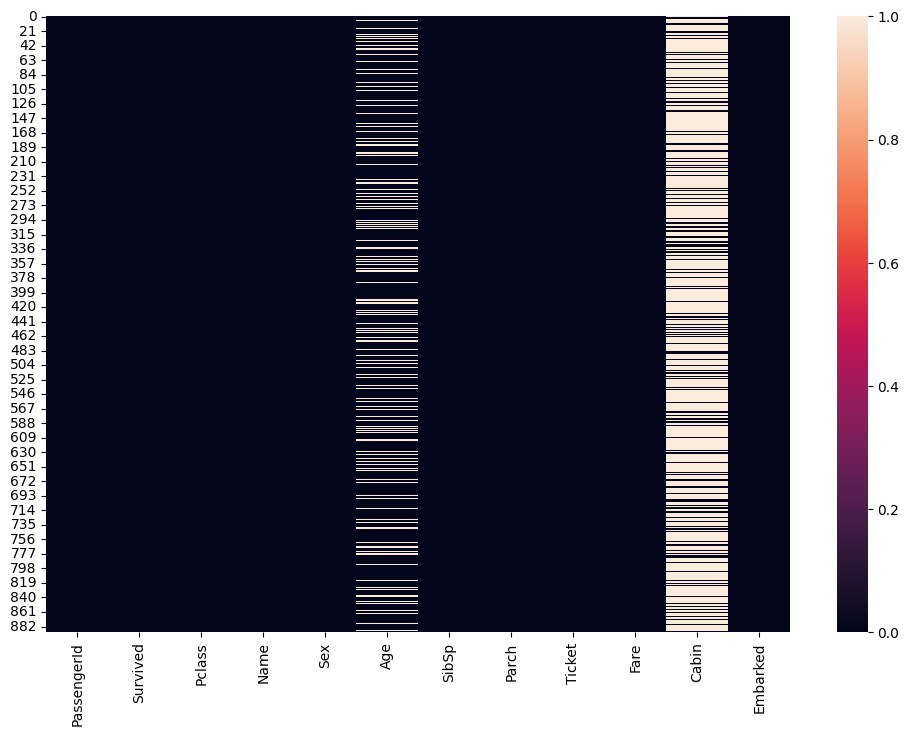

In [6]:
plt.figure(figsize=(12,8))
sb.heatmap(df.isnull())

## handling the missing value

###removing unneccessary columns

In [5]:
# Step 1: Drop columns with too many missing values or irrelevant
df_cleaned = df.drop(columns=['Cabin', 'Ticket'])

###filling null value


In [7]:
#For numerical features, you can use mean or median:
df['Age'] = df['Age'].fillna(df['Age'].median())  # Using median for Age
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())  # Using mean for Fare

In [8]:
#For categorical features, you can use mode or a placeholder:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Using mode for Embarked

##Convert Categorical Features into Numerical

In [10]:
# Initialize LabelEncoders
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

# Apply Label Encoding
df['Sex'] = le_sex.fit_transform(df['Sex'])         # male=1, female=0
df['Embarked'] = le_embarked.fit_transform(df['Embarked'].astype(str))  # C=0, Q=1, S=2

# Show result
print(df[['Sex', 'Embarked']].head())

   Sex  Embarked
0    1         2
1    0         0
2    0         2
3    0         2
4    1         2


###standize data

In [12]:
# Standardize Fare (mean = 0, std = 1)
scaler = StandardScaler()
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']])

# Show result
print(df[['Fare', 'Fare_scaled']].head())

      Fare  Fare_scaled
0   7.2500    -0.502445
1  71.2833     0.786845
2   7.9250    -0.488854
3  53.1000     0.420730
4   8.0500    -0.486337


### Plot boxplots to see outliers

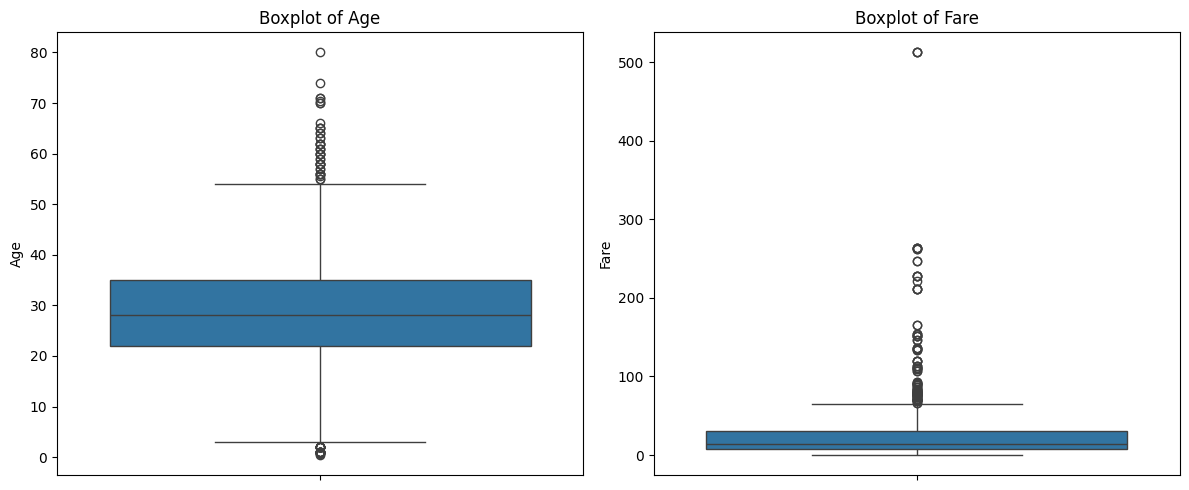

In [13]:
# Plot boxplots to see outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sb.boxplot(y=df['Age'])
plt.title('Boxplot of Age')

plt.subplot(1, 2, 2)
sb.boxplot(y=df['Fare'])
plt.title('Boxplot of Fare')

plt.tight_layout()
plt.show()

##remove the outliers

In [14]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Apply outlier removal on Age and Fare
df = remove_outliers_iqr(df, 'Age')
df = remove_outliers_iqr(df, 'Fare')

# Show the shape of data after removing outliers
print("Data shape after removing outliers:", df.shape)

Data shape after removing outliers: (718, 13)


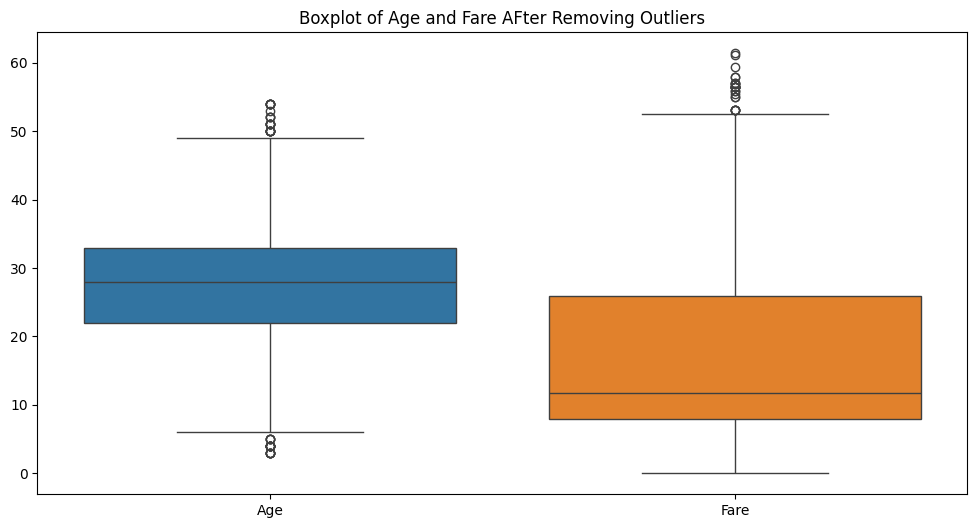

In [15]:
plt.figure(figsize=(12, 6))
sb.boxplot(data=df[['Age', 'Fare']])
plt.title('Boxplot of Age and Fare AFter Removing Outliers')
plt.show()
